In [1]:
import pandas as pd
import keras_tuner as kt
from tensorflow import keras
import my_functions_v13 as my
import importlib
import seaborn as sns
import pdb
import numpy as np
from scipy.stats.mstats import winsorize
importlib.reload(my)

<module 'my_functions_v13' from '/Users/lucasumann/PycharmProjects/Masterarbeit/Notebooks/my_functions_v13.py'>

In [2]:
import matplotlib.pyplot as plt

In [3]:
model1 = my.cond_auto_model("Graphical Inspection 1")

In [4]:
model1.initialize_X_Y()

In [5]:
Y_train, X_train, Y_valid, X_valid, Y_test, X_test, variables, dim_factors, list_hidden_neurons, Y = model1.Y_train, model1.X_train, model1.Y_valid, model1.X_valid, model1.Y_test, model1.X_test, model1.variables, model1.factor_dim, model1.list_covar_hidden_neurons, model1.Y

In [6]:
# Build model
conditional_autoencoder_model_4 = my.link_both_parts(num_coins=Y_train.shape[1],
                                                input_dimension = X_train[-1].shape[1],
                                                num_covariates=len(X_train[0].columns),
                                                encoding_dim=dim_factors,
                                                list_no_hidden=list_hidden_neurons,
                                                lambda_reg= 0)
# Optimizer we use
opt = keras.optimizers.Adam(
    learning_rate=0.001
)

# Compile model
conditional_autoencoder_model_4.compile(
    loss="mean_squared_error",
    optimizer=opt
)

2023-02-11 12:36:07.254668: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-11 12:36:07.263432: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [7]:
fit_4 = conditional_autoencoder_model_4.fit(
    x = X_train,
    y = Y_train,
    epochs = 1000,
    batch_size = 64,
    validation_data = (X_valid, Y_valid)
)

2023-02-11 12:36:12.954719: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/1000


2023-02-11 12:36:30.532718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 0.0112

2023-02-11 12:37:05.310091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 59s 3s/step - loss: 0.0112 - val_loss: 0.0156
Epoch 2/1000
9/9 [==============================] - 10s 1s/step - loss: 0.0081 - val_loss: 0.0119
Epoch 3/1000
9/9 [==============================] - 9s 963ms/step - loss: 0.0065 - val_loss: 0.0100
Epoch 4/1000
9/9 [==============================] - 9s 985ms/step - loss: 0.0057 - val_loss: 0.0090
Epoch 5/1000
9/9 [==============================] - 9s 1s/step - loss: 0.0051 - val_loss: 0.0084
Epoch 6/1000
9/9 [==============================] - 9s 1s/step - loss: 0.0047 - val_loss: 0.0080
Epoch 7/1000
9/9 [==============================] - 10s 1s/step - loss: 0.0044 - val_loss: 0.0077
Epoch 8/1000
9/9 [==============================] - 10s 1s/step - loss: 0.0042 - val_loss: 0.0074
Epoch 9/1000
9/9 [==============================] - 10s 1s/step - loss: 0.0040 - val_loss: 0.0072
Epoch 10/1000
9/9 [==============================] - 9s 1s/step - loss: 0.0039 - val_loss: 0.0071
Epoch 11/1000
9/9 [============

In [8]:
training_loss = fit_4.history["loss"]
validation_loss = fit_4.history["val_loss"]

In [10]:
training_loss_example = pd.DataFrame({"Training loss":training_loss, "Validation loss": validation_loss})

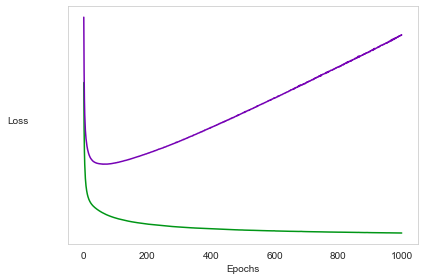

In [20]:
fig, ax1= plt.subplots(1, sharex = True)
sns.lineplot(data = training_loss_example, x = training_loss_example.index, y = "Training loss", ax = ax1, color = [0, 150/255, 22/255])
ax1.set_xlabel("Epochs")

ax1.set_yticks([])
ax1.set_ylabel("Loss", rotation = 0, labelpad = 50)
ax1.grid(False)

sns.lineplot(data = training_loss_example, x = training_loss_example.index, y = "Validation loss", ax = ax1, color = [118 /255, 2 /255, 181 /255])




plt.tight_layout()
plt.savefig("../Plots/Overfitting example.png", transparent = True, dpi = 600)